# T81-558: Applications of Deep Neural Networks
**Module 4: Training for Tabular Data**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 4 Material

* Part 4.1: Encoding a Feature Vector for Keras Deep Learning [[Video]](https://www.youtube.com/watch?v=Vxz-gfs9nMQ&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_04_1_feature_encode.ipynb)
* Part 4.2: Keras Multiclass Classification for Deep Neural Networks with ROC and AUC [[Video]](https://www.youtube.com/watch?v=-f3bg9dLMks&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_04_2_multi_class.ipynb)
* Part 4.3: Keras Regression for Deep Neural Networks with RMSE [[Video]](https://www.youtube.com/watch?v=wNhBUC6X5-E&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_04_3_regression.ipynb)
* **Part 4.4: Backpropagation, Nesterov Momentum, and ADAM Neural Network Training** [[Video]](https://www.youtube.com/watch?v=VbDg8aBgpck&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_04_4_backprop.ipynb)
* Part 4.5: Neural Network RMSE and Log Loss Error Calculation from Scratch [[Video]](https://www.youtube.com/watch?v=wmQX1t2PHJc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_04_5_rmse_logloss.ipynb)

# Part 4.4: Training Neural Networks

# Classic Backpropagation
Backpropagation is the primary means by which a neural network's weights are determined during training. Backpropagation works by calculating a weight change amount ($v_t$) for every weight($\theta$, theata) in the neural network.  This value is subtracted from every weight by the following equation: 

$ \theta_t = \theta_{t-1} - v_t $

This process is repeated for every iteration($t$).  How the weight change is calculated depends on the training algorithm.  Classic backpropagation simply calculates a gradient ($\nabla$, nabla) for every weight in the neural network with respect to the error function ($J$) of the neural network.  The gradient is scaled by a learning rate ($\eta$, eta).

$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) $

The learning rate is an important concept for backpropagation training.  Setting the learning rate can be complex:

* Too low of a learning rate will usually converge to a good solution; however, the process will be very slow.
* Too high of a learning rate will either fail outright, or converge to a higher error than a better learning rate.

Common values for learning rate are: 0.1, 0.01, 0.001, etc.

Gradients:

![Derivative](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_deriv.png "Derivative")

The following link, from the book, shows how a simple [neural network is trained with backpropagation](http://www.heatonresearch.com/aifh/vol3/).

### Momentum Backpropagation

Momentum adds another term to the calculation of $v_t$:

$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) + \lambda v_{t-1} $

Like the learning rate, momentum adds another training parameter that scales the effect of momentum.  Momentum backpropagation has two training parameters: learning rate ($\eta$, eta) and momentum ($\lambda$, lambda).  Momentum simply adds the scaled value of the previous weight change amount ($v_{t-1}$) to the current weight change amount($v_t$).

This has the effect of adding additional force behind a direction a weight was moving.  This might allow the weight to escape a local minima:

![Momentum](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_momentum.png "Momentum")

A very common value for momentum is 0.9.


### Batch and Online Backpropagation

How often should the weights of a neural network be updated?  Gradients can be calculated for a training set element.  These gradients can also be summed together into batches and the weights updated once per batch.

* **Online Training** - Update the weights based on gradients calculated from a single training set element.
* **Batch Training** - Update the weights based on the sum of the gradients over all training set elements.
* **Batch Size** - Update the weights based on the sum of some batch size of training set elements.
* **Mini-Batch Training** - The same as batch size, but with a very small batch size.  Mini-batches are very popular and they are often in the 32-64 element range.

Because the batch size is smaller than the complete training set size, it may take several batches to make it completely through the training set.  

* **Step/Iteration** - The number of batches that were processed.
* **Epoch** - The number of times the complete training set was processed.


# Stochastic Gradient Descent

Stochastic gradient descent (SGD) is currently one of the most popular neural network training algorithms.  It works very similarly to Batch/Mini-Batch training, except that the batches are made up of a random set of training elements.

This leads to a very irregular convergence in error during training:

![SGD Error](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_sgd_error.png "SGD Error")
[Image from Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

Because the neural network is trained on a random sample of the complete training set each time, the error does not make a smooth transition downward.  However, the error usually does go down.

Advantages to SGD include:

* Computationally efficient.  Even with a very large training set, each training step can be relatively fast.
* Decreases overfitting by focusing on only a portion of the training set each step.


### Other Techniques

One problem with simple backpropagation training algorithms is that they are highly sensative to learning rate and momentum.  This is difficult because:

* Learning rate must be adjusted to a small enough level to train an accurate neural network.
* Momentum must be large enough to overcome local minima, yet small enough to not destabilize the training.
* A single learning rate/momentum is often not good enough for the entire training process. It is often useful to automatically decrease learning rate as the training progresses.
* All weights share a single learning rate/momentum.

Other training techniques:

* **Resilient Propagation** - Use only the magnitude of the gradient and allow each neuron to learn at its own rate.  No need for learning rate/momentum; however, only works in full batch mode.
* **Nesterov accelerated gradient** - Helps mitigate the risk of choosing a bad mini-batch.
* **Adagrad** - Allows an automatically decaying per-weight learning rate and momentum concept.
* **Adadelta** - Extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate.
* **Non-Gradient Methods** - Non-gradient methods can *sometimes* be useful, though rarely outperform gradient-based backpropagation methods.  These include: [simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing), [genetic algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm), [particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization), [Nelder Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method), and [many more](https://en.wikipedia.org/wiki/Category:Optimization_algorithms_and_methods).

### ADAM Update

ADAM is the first training algorithm you should try.  It is very effective.  Kingma and Ba (2014) introduced the Adam update rule that derives its name from the adaptive moment estimates that it uses.  Adam estimates the first (mean) and second (variance) moments to determine the weight corrections.  Adam begins with an exponentially decaying average of past gradients (m):

$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $

This average accomplishes a similar goal as classic momentum update; however, its value is calculated automatically based on the current gradient ($g_t$).  The update rule then calculates the second moment ($v_t$):

$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $

The values $m_t$ and $v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively.  However, they will have a strong bias towards zero in the initial training cycles.  The first moment’s bias is corrected as follows.

$ \hat{m}_t = \frac{m_t}{1-\beta^t_1} $

Similarly, the second moment is also corrected:

$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $

These bias-corrected first and second moment estimates are applied to the ultimate Adam update rule, as follows:

$ \theta_t = \theta_{t-1} - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t}+\eta} \hat{m}_t $

Adam is very tolerant to initial learning rate (\alpha) and other training parameters. Kingma and Ba (2014)  propose default values of 0.9 for $\beta_1$, 0.999 for $\beta_2$, and 10-8 for $\eta$.

### Methods Compared

The following image shows how each of these algorithms train (image credits: [author](Alec Radford), [where I found it](http://sebastianruder.com/optimizing-gradient-descent/index.html#visualizationofalgorithms) ):

![Training Techniques](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/contours_evaluation_optimizers.gif "Training Techniques")



### Specifying the Update Rule in Tensorflow

TensorFlow allows the update rule to be set to one of:

* Adagrad
* **Adam**
* Ftrl
* Momentum
* RMSProp
* **SGD**



Restoring model weights from the end of the best epoch.
Epoch 00133: early stopping


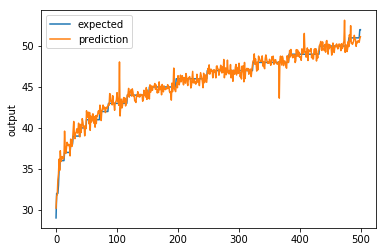

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam') # Modify here
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)

# Plot the chart
chart_regression(pred.flatten(),y_test)